**Preparatory steps**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set = pd.read_csv('train_set.csv')
train_set = train_set.drop(['Unnamed: 0'], axis=1)
train_set.head()

,Store,Weekly_Sales,IsHoliday,Dept,CPI,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Month,Day,Year,Week,Store_size
0,1,25293.49,0,1,218.714733,48.91,3.172,5629.51,68.0,1398.11,2084.64,20475.32,7.866,12,2,1,0,151315
1,1,45928.14,0,2,218.714733,48.91,3.172,5629.51,68.0,1398.11,2084.64,20475.32,7.866,12,2,1,0,151315
2,1,10146.54,0,3,218.714733,48.91,3.172,5629.51,68.0,1398.11,2084.64,20475.32,7.866,12,2,1,0,151315
3,1,38489.63,0,4,218.714733,48.91,3.172,5629.51,68.0,1398.11,2084.64,20475.32,7.866,12,2,1,0,151315
4,1,32572.27,0,5,218.714733,48.91,3.172,5629.51,68.0,1398.11,2084.64,20475.32,7.866,12,2,1,0,151315


In [3]:
Unknown_set = pd.read_csv('Unknown_set.csv')
Unknown_set = Unknown_set.drop(['Unnamed: 0'], axis=1)
Unknown_set.head()

,Store,Dept,IsHoliday,Month,Year,Day,Week
0,1,1,0,12,2,7,0
1,1,1,0,12,2,14,1
2,1,1,0,12,2,21,2
3,1,1,1,12,2,28,3
4,1,2,0,12,2,7,0


### Modification #1: Replacing Store number with store type and One-hot encoding

In [4]:
store_details = pd.read_csv('stores.csv')
store_details.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


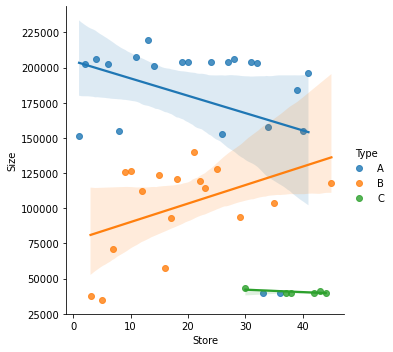

In [5]:
sns.lmplot(data = store_details, x = 'Store', y = 'Size', hue = 'Type')

Replace store with store type.

In [6]:
store_type = store_details[['Store', 'Size']].copy().set_index('Store').T.to_dict('list')
;

''

In [7]:
train_set['Store_size'] = train_set['Store'].apply(lambda x: store_type[x][0])
Unknown_set['Store_size'] = Unknown_set['Store'].apply(lambda x: store_type[x][0])

In [8]:
"""
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_set['Store'] = le.fit_transform(train_set['Store'])
Unknown_set['Store'] = le.transform(Unknown_set['Store'])

"""

"\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\n\ntrain_set['Store'] = le.fit_transform(train_set['Store'])\nUnknown_set['Store'] = le.transform(Unknown_set['Store'])\n\n"

**--------------------------------------------------------------------------------------------------------------------**

In [9]:
corr_matrix = train_set.corr()
corr_matrix["Weekly_Sales"].sort_values(ascending=False)

# Remove: IsHoliday, MarkDown4, Unemployment, and Store

Weekly_Sales    1.000000
Store_size      0.245050
Dept            0.147963
MarkDown5       0.090564
MarkDown1       0.086500
MarkDown3       0.062031
MarkDown4       0.061569
Month           0.035975
MarkDown2       0.032607
IsHoliday       0.017946
Week           -0.001997
Day            -0.003945
Temperature    -0.007641
Fuel_Price     -0.013919
CPI            -0.019885
Unemployment   -0.031533
Year           -0.047868
Store          -0.087182
Name: Weekly_Sales, dtype: float64

In [10]:
# for visualization
train_set.to_csv('train_set.csv')

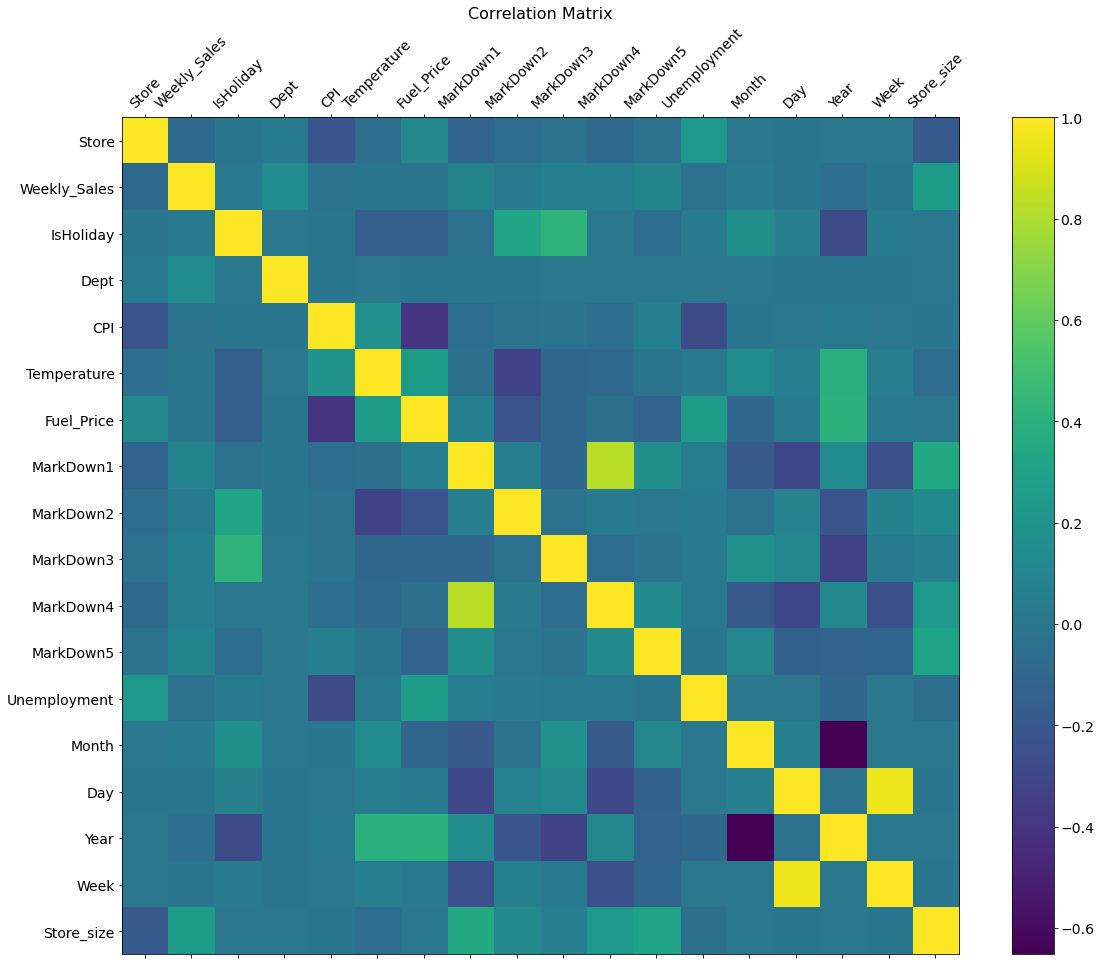

In [11]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(train_set.select_dtypes(['number']).shape[1]), train_set.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_set.select_dtypes(['number']).shape[1]), train_set.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# MarkDown2 and IsHoliday
# MarkDown3 and IsHoliday
# Fuel Price and Unemployment
# MarkDown4 and MarkDown1

**--------------------------------------------------------------------------------------------------------------------**

One hot encode department, month, and week

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

In [13]:
def OH_dataframe(OH_arr, labels, data, toDrop):
    var_series = pd.DataFrame(OH_arr, columns = labels)
    data = data.drop(toDrop, axis=1)  
    data = pd.concat([data, var_series], axis=1)
    return data

Concatenate column name with each row value.

In [14]:
train_set['Dept_'] = train_set['Dept'].apply(lambda x: 'Dept' + str(x))
train_set['Month_'] = train_set['Month'].apply(lambda x: 'Month' + str(x))
train_set['Week_'] = train_set['Week'].apply(lambda x: 'Week' + str(x))

In [15]:
Unknown_set['Dept_'] = Unknown_set['Dept'].apply(lambda x: 'Dept' + str(x))
Unknown_set['Month_'] = Unknown_set['Month'].apply(lambda x: 'Month' + str(x))
Unknown_set['Week_'] = Unknown_set['Week'].apply(lambda x: 'Week' + str(x))

Department

In [16]:
Dept_OH_train = ohe.fit_transform(train_set['Dept_'].to_numpy().reshape(-1, 1)).toarray()
Dept_OH_unknown = ohe.transform(Unknown_set['Dept_'].to_numpy().reshape(-1, 1)).toarray()

Dept_labels = train_set['Dept_'].unique().tolist()

train_set = OH_dataframe(Dept_OH_train, Dept_labels, train_set, 'Dept_')
Unknown_set = OH_dataframe(Dept_OH_unknown, Dept_labels, Unknown_set, 'Dept_')

Month

In [17]:
Month_OH_train = ohe.fit_transform(train_set['Month_'].to_numpy().reshape(-1, 1)).toarray()
Month_OH_unknown = ohe.transform(Unknown_set['Month_'].to_numpy().reshape(-1, 1)).toarray()

Month_labels = train_set['Month_'].unique().tolist()

train_set = OH_dataframe(Month_OH_train, Month_labels, train_set, 'Month_')
Unknown_set = OH_dataframe(Month_OH_unknown, Month_labels, Unknown_set, 'Month_')

Week

In [18]:
Week_OH_train = ohe.fit_transform(train_set['Week_'].to_numpy().reshape(-1, 1)).toarray()
Week_OH_unknown = ohe.transform(Unknown_set['Week_'].to_numpy().reshape(-1, 1)).toarray()

Week_labels = train_set['Week_'].unique().tolist()

train_set = OH_dataframe(Week_OH_train, Week_labels, train_set, 'Week_')
Unknown_set = OH_dataframe(Week_OH_unknown, Week_labels, Unknown_set, 'Week_')

## Predict Weekly Sales without the lost variables

- We need long term data to actually see the effect of CPI, Temperature, Unemployment, and Fuel Price.

In [19]:
train_set_df = train_set.drop(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split

y = train_set_df['Weekly_Sales'].copy()
Z = train_set_df[['Dept', 'Year', 'Month', 'Week', 'Day', 'Store']].copy()
X = train_set_df.drop(['Weekly_Sales', 'Dept', 'Year', 'Month', 'Week', 'Day', 'Store'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

average_weeklysales = y_train.mean()
baseline_test_predictions = [average_weeklysales]*len(X_test)

baseline = mean_absolute_error(baseline_test_predictions, y_test)
R2 = r2_score(baseline_test_predictions, y_test)

print('Baseline Error:', baseline)
print('R2:', R2)

Baseline Error: 15542.482345605193
R2: -4.106202865618457e+31


In [22]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_predictions = dtr.predict(X_train)
dtr_error = mean_absolute_error(dtr_predictions, y_train)
R2 = r2_score(dtr_predictions, y_train)

depth = dtr.get_depth()
alpha = dtr.get_params()['ccp_alpha']
tree_score = dtr_error + alpha * depth

print('depth:', depth)
print('alpha:', alpha)
print('tree score:', tree_score)
print('error:', dtr_error)
print('R2:', R2)

depth: 98
alpha: 0.0
tree score: 300.07667199412595
error: 300.07667199412595
R2: 0.9942856213647522


In [23]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_predictions = dtr.predict(X_test)
dtr_error = mean_absolute_error(dtr_predictions, y_test)
R2 = r2_score(dtr_predictions, y_test)

depth = dtr.get_depth()
alpha = dtr.get_params()['ccp_alpha']
tree_score = dtr_error + alpha * depth

print('depth:', depth)
print('alpha:', alpha)
print('tree score:', tree_score)
print('error:', dtr_error)
print('R2:', R2)

depth: 98
alpha: 0.0
tree score: 2380.1845198741307
error: 2380.1845198741307
R2: 0.9348923226182944


In [24]:
X = Unknown_set.drop(['Dept', 'Year', 'Month', 'Week', 'Day', 'Store'], axis=1)

In [25]:
final_y = dtr.predict(X)
final_y = pd.Series(final_y, name='Weekly_Sales')

In [26]:
final_df = pd.concat([Unknown_set, final_y], axis=1)

In [36]:
final_df = final_df[['Store', 'Dept', 'IsHoliday', 'Year', 'Month', 'Week', 'Day', 'Store_size', 'Weekly_Sales']].copy()
final_df.head()

,Store,Dept,IsHoliday,Year,Month,Week,Day,Store_size,Weekly_Sales
0,1,1,0,2,12,0,7,151315,23350.88
1,1,1,0,2,12,1,14,151315,33305.92
2,1,1,0,2,12,2,21,151315,29046.88
3,1,1,1,2,12,3,28,151315,46788.75
4,1,2,0,2,12,0,7,151315,45928.14


In [35]:
train_set = train_set[['Store', 'Dept', 'IsHoliday', 'Year', 'Month', 'Week', 'Day', 'Store_size', 'Weekly_Sales']].copy()
train_set.head()

,Store,Dept,IsHoliday,Year,Month,Week,Day,Store_size,Weekly_Sales
0,1,1,0,1,12,0,2,151315,25293.49
1,1,2,0,1,12,0,2,151315,45928.14
2,1,3,0,1,12,0,2,151315,10146.54
3,1,4,0,1,12,0,2,151315,38489.63
4,1,5,0,1,12,0,2,151315,32572.27


In [38]:
train_set.to_csv('train_set_df.csv')
final_df.to_csv('final_df.csv')